# One sample test against population statistics
**1. Population mean (when population variance is known)**

**2. Population mean (when population variance is unknown)**
- **Special Case: Paired T-test**

**3. Population proportion**
- **Special Case: Comparing Two Proportions**

**4. Population variance**

# 1. Population mean (when population variance is known)

## Packages

In [1]:
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm
import numpy as np
import pandas as pd

## Random data generation

In [8]:
# Assume we have a sample data following a normal distribution
# with mean closes to 80.94, standard deviation closes to 11.6, and sample size = 25
sample_data = np.random.normal(loc = 80.94, scale = 11.6 ,size = 25)

In [9]:
print(round(np.mean(sample_data), 4))
print(round(np.std(sample_data), 4))
print(len(sample_data))

80.8493
12.256
25


## Test normality assumption

In [10]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt 
import seaborn as sb

In [11]:
# Set the default visualziation configuration
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)

### Method 1. Density Plot

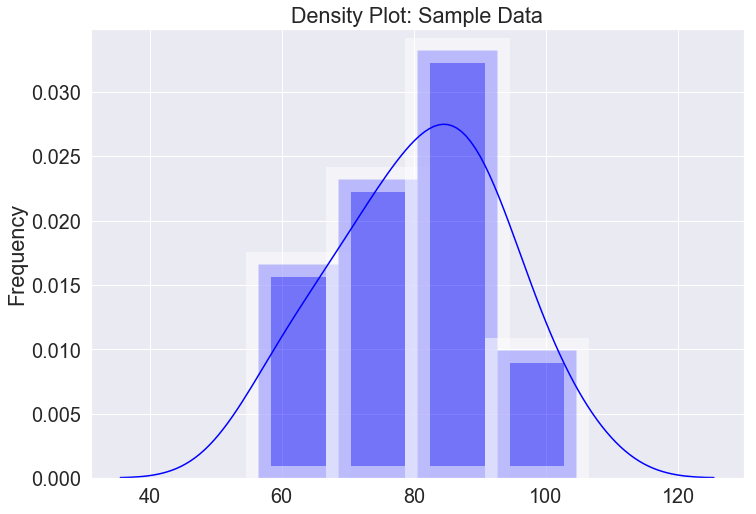

In [12]:
ax = sb.distplot(sample_data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Density Plot: Sample Data', ylabel = 'Frequency')
plt.show()

### Method 2. Visualization - Quantile-Quantile Plot

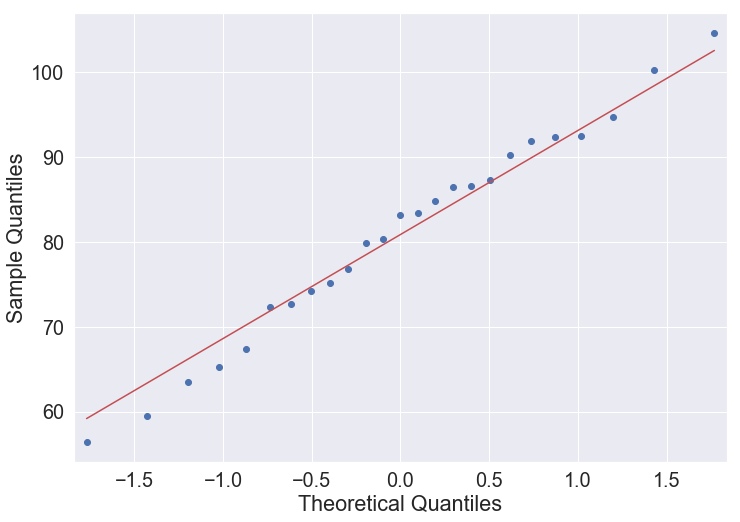

In [13]:
qqplot(sample_data, line='s')
plt.show()

### Method 3. Statistical Testing - Using Shapiro-Wilk Test

In [14]:
from scipy.stats import shapiro

In [15]:
stat, p = shapiro(sample_data)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)', p)
else:
    print('Sample does not look Gaussian (reject H0)', p)

Sample looks Gaussian (fail to reject H0) 0.9331801533699036


## 1.1 Assumptions in Z-test
- **A random sample from a normal population with known variance, or**
- **Sample size is larger than 30 (if variance is unknown, it can be approximated by sample variance)**

## 1.2 Question
- **Boys of a certain age are known to have a mean weight of μ = 85 pounds. A complaint is made that the boys living in a municipal children's home are underfed. As one bit of evidence, n = 25 boys (of the same age) are weighed and found to have a mean weight of 80.94 pounds. It is known that the population standard deviation is 11.6 pounds (the unrealistic part of this example!).**

- **Test the null hypothesis that the weight of the population mean is 85 pounds.**

$$H_0: \mu = 85$$

$$H_a: \mu < 85$$

$$Z = \frac {\bar {x} - \mu} {\frac{\sigma} {\sqrt{n}}}$$

In [16]:
z_test_statistic = (80.94 - 85) / (11.6 / 5)
z_test_statistic

-1.750000000000001

In [19]:
# Reference: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html
alpha_level = 0.05
p_value = 1 - norm.cdf(x = abs(z_test_statistic))
if p_value < alpha_level:
    print('There is a strong evidence that the average weight of boys of a certain age\ndiffers from 85 pounds.')
    print('The Z test statistic is {}.'.format(round(z_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value,4)))
else: 
    print('There is little or no evidence that the average weight of boys of a certain age differs\nfrom 85 pounds.')
    print('The Z test statistic is {}.'.format(round(z_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value,4)))

There is a strong evidence that the average weight of boys of a certain age
differs from 85 pounds.
The Z test statistic is -1.75.
The corresponding p-value is 0.0401.


- **Construct a 95% confidence interval**

$$SE(\bar{x}) = \frac {\sigma} {\sqrt{n}}$$

$$P(\bar{x} - Z_{\alpha/2} * SE(\bar{x}) < \mu < \bar{x} + Z_{\alpha/2} * SE(\bar{x})) = 1 - \alpha$$

In [20]:
# Since the problem (Ha) is one-sided, 
# I constructed the upper bound given the alpha level = 0.05
# Notice that the upper bound is still less than 85
SE_X = 11.6 / 5
upper_bound = 80.94 + abs(norm.ppf(q = alpha_level)*SE_X)
print('The 95% upper bound of the estimator is {}.'.format(round(upper_bound, 4)))

The 95% upper bound of the estimator is 84.7561.


In [21]:
# Example of using random data
# Want to test whether the mean in the sample data is close to the population mean (85)
population_mean = 85

# From above normality testing results, the sample data is normally distributed, we can do z-test
z_test_statistic, p_value = stests.ztest(sample_data, value = population_mean, 
                                         alternative = 'two-sided')

In [22]:
alpha = 0.05
if p_value < alpha_level:
    print('There is a strong evidence that the average weights of boys of a certain age\ndiffer from 85 pounds.')
    print('The Z test statistic is {}.'.format(round(z_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value,4)))
else: 
    print('There is little or no evidence that the average weights of boys of a certain age differ\nfrom 85 pounds.')
    print('The Z test statistic is {}.'.format(round(z_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value,4)))

There is little or no evidence that the average weights of boys of a certain age differ
from 85 pounds.
The Z test statistic is -1.6591.
The corresponding p-value is 0.0971.


# 2. Population mean (when population variance is unknown)

## 2.1 Formula

$$T = \frac {\bar {x} - \mu} {\frac{s} {\sqrt{n}}}$$

$$ d.f. = n - 1 $$

## 2.2 Question
- **It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg.**

- **Is the group significantly different (with respect to systolic blood pressure!) from the regular population?**

$$ H_0: \mu = 120 $$

$$ H_a: \mu \neq 120 $$

In [23]:
t_test_statistic = (130.1 - 120) / (21.21 / 10)
t_test_statistic

4.761904761904759

In [24]:
# Reference: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html
from scipy.stats import t
alpha_level = 0.05
p_value = (1 - t.cdf(x = t_test_statistic, df = 100 - 1)) * 2
if p_value < alpha_level:
    print('There is a strong evidence that the group is significantly different with respect to systolic blood pressure from the regular population.')
    print('The T test statistic is {}.'.format(round(t_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value,4)))
else: 
    print("We don't have a strong evidence that the group is significantly different with respect to systolic blood pressure from the regular population.")
    print('The T test statistic is {}.'.format(round(t_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value,4)))

There is a strong evidence that the group is significantly different with respect to systolic blood pressure from the regular population.
The T test statistic is 4.7619.
The corresponding p-value is 0.0.


- **Find a 95% confidence interval.**

$$SE(\bar{x}) = \frac {s} {\sqrt{n}}$$

$$P(\bar{x} - T_{\alpha/2} * SE(\bar{x}) < \mu < \bar{x} + T_{\alpha/2} * SE(\bar{x})) = 1 - \alpha$$

In [25]:
SE_X = 21.21/(100**(1/2))

In [26]:
lower_bound, upper_bound = (130.1 - t.ppf(q = 1 - (alpha_level/2), df = 100-1) * SE_X, 
                            130.1 + t.ppf(q = 1 - (alpha_level/2), df = 100-1) * SE_X)

In [27]:
# Notice that the 95% C.I doesn't include 120!
print('The 95% C.I. is [{} {}].'.format(round(lower_bound, 4), 
                                        round(upper_bound, 4)
                                       ))

The 95% C.I. is [125.8915 134.3085].


In [37]:
# Reference: https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html

# Example of using random data
from scipy.stats import norm
my_data = norm.rvs(loc=130.1, scale=21.21, size=100)
print(np.mean(my_data))
print(np.std(my_data))

127.60474850171425
22.395278988604982


In [38]:
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp

#The input requires an array of data, that's why I generated random data
from scipy.stats import ttest_1samp
ttest_1samp(a = my_data, popmean = 120)

Ttest_1sampResult(statistic=3.3786715608280997, pvalue=0.0010428293561648434)

# Special Case: Paired T-test

There may be occasions in which we are interested in comparing the means of two dependent populations. 

For example, suppose a researcher is interested in determining whether the mean IQ of the population of first-born twins differs from the mean IQ of the population of second-born twins. 

In this case, she's interested in determining whether:

$$ \mu_X = \mu_Y $$

or equivalently if:

$$ \mu_X - \mu_Y = 0 $$

Now, the population of first-born twins is not independent of the population of second-born twins. Since all of our distributional theory requires the independence of measurements, we're rather stuck. There's a way out though... we can "remove" the dependence between X and Y by subtracting the two measurements Xi and Yi for each pair of twins i, that is, by considering the independent measurements:

$$ D_i = X_i - Y_i $$

## Formula

$$T = \frac {\bar {d} - \mu_0} {\frac{S_D} {\sqrt{n}}}$$

$$ d.f. = n - 1 $$

## Question
- **Blood samples from n = 10 people were sent to each of two laboratories (Lab 1 and Lab 2) for cholesterol determinations. The resulting data are summarized here:**

| Subject | Lab 1 | Lab 2 | Diff |
| --- | --- | --- | --- |
| 1 | 296 | 318 | -22 |
| 2 | 268 | 287 | -19 |
| ... | ... | ... | ... |
| 10 | 262 | 285 | -23 |

$$ \bar {x_1} = 260.6, \bar {x_2} = 275, \bar {d} = -14.4, s_d = 6.77 $$

- **Is there a statistically significant difference at the α = 0.01 level, say, in the (population) mean cholesterol levels reported by Lab 1 and Lab 2?**

$$ H_0: \bar{d} = 0 $$

$$ H_a: \bar{d} \neq 0 $$

In [41]:
alpha_level = 0.01
t_test_statistic = (-14.4-0) / (6.77 / (10**(1/2)))
p_value = (1 - t.cdf(x = abs(t_test_statistic), df = 10 - 1)) * 2

if p_value < alpha_level:
    print('There is a strong evidence that the means of cholesterol levels reported by Lab 1 and Lab 2 are different.')
    print('The t test statistic is {}.'.format(round(t_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value, 4)))
else:
    print("We don't have a strong evidence that the means of cholesterol levels reported by Lab 1 and Lab 2 are different.")
    print('The t test statistic is {}.'.format(round(t_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value, 4)))

There is a strong evidence that the means of cholesterol levels reported by Lab 1 and Lab 2 are different.
The t test statistic is -6.7263.
The corresponding p-value is 0.0001.


- **Construct a 99% confidence interval.**

$$SE(\bar{d}) = \frac {\sigma_d} {\sqrt{n}}$$

$$P(\bar{d} - T_{\alpha/2} * SE(\bar{d}) < \mu < \bar{d} + T_{\alpha/2} * SE(\bar{d})) = 1 - \alpha$$

In [43]:
# Notice that the 99% C.I. doesn't contain 0!
SE_X = 6.77 / (10**(1/2))
lower_bound, upper_bound = (-14.4 - abs(t.ppf(q = 1 - (alpha_level/2), df = 10-1) * SE_X), 
                            -14.4 + abs(t.ppf(q = 1 - (alpha_level/2), df = 10-1) * SE_X))
print('The 99% C.I. is [{} {}].'.format(round(lower_bound, 4), 
                                        round(upper_bound, 4)
                                       ))

The 99% C.I. is [-21.3574 -7.4426].


# 3. Population proportion

## 3.1 Formula

$$SE_0(\hat{p}) = \sqrt{\frac {\hat{p}*(1-\hat{p})} {n}} $$

$$Z = \frac {\hat {p} - p_0} {SE_0(\hat {p})}$$

## 3.2 Hypothesis testing of population proportion (with an example)

### Question
- **In a telephone poll of 1000 adult Americans, 440 said that they are interested in buying a new released product.**

- **Test the null hypothesis that the true proportion is 0.5.**

$$H_0: p = 0.5$$

$$H_a: p < 0.5$$

In [57]:
count = 440
n_obs = 1000
population_p = 0.5
stat, pval = proportions_ztest(count, n_obs, population_p)
print('Test statistic is:', round(stat, 4))
print('P-value is:', round(pval, 4))

Test statistic is: -3.8224
P-value is: 0.0001


In [58]:
# Hand calculation
SE_0 = (((count/n_obs)*(1 - (count/n_obs))) / n_obs)**(1/2)
z_test_statistic = ((count/n_obs) - population_p) / SE_0
p_value = norm.cdf(z_test_statistic, loc = 0, scale = 1)

In [59]:
alpha_level = 0.05
if p_value < alpha_level:
    print('There is a strong evidence that the true population proportion is 0.5.')
    print('The Z test statistic is {}.'.format(round(z_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value, 4)))
else: 
    print("We don't have a strong evidence that the true population proportion is 0.5.")
    print('The Z test statistic is {}.'.format(round(z_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value, 4)))

There is a strong evidence that the true population proportion is 0.5.
The Z test statistic is -3.8224.
The corresponding p-value is 0.0001.


In [60]:
# However, for python, there is a problem for handling number with many decimal points
# First, calculate SE0
((0.5*(1-0.5)) / 1000)**(1/2)

0.015811388300841896

In [61]:
# Z test statistic
(0.44 - 0.5)/0.015811388300841896

-3.7947331922020555

In [62]:
# P-value
norm.cdf(-3.7947, loc = 0, scale = 1)

7.391104190949198e-05

- **Construct a 95% confidence interval for p.**

$$ P(\hat{p} - Z_{\alpha/2}*SE_0(\hat{p}) < p < \hat{p} + Z_{\alpha/2}*SE_0(\hat{p})) = 1 -\alpha$$

In [63]:
upper_range = (count / n_obs) + norm.interval(0.95, loc = 0, scale = 1)[1]*SE_0
lower_range = (count / n_obs) + norm.interval(0.95, loc = 0, scale = 1)[0]*SE_0

In [64]:
# Notice that the 95% C.I. doesn't contain 0.5!
print('The 95% confidence interval for p is [{}, {}]'.format(
    round(lower_range, 4), round(upper_range, 4)))

The 95% confidence interval for p is [0.4092, 0.4708]


# Special Case: Comparing Two Proportions

## Formula

$$ Z = \frac {(\hat{p_1}-\hat{p_2})-0} {\sqrt{
\hat{p}(1-\hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}
}$$

$$ \hat{p} = \frac {Y_1+Y_2} {n_1+n_2} $$

## Question
- **Time magazine reported the result of a telephone poll of 800 adult Americans. The question posed of the Americans who were surveyed was: "Should the federal tax on cigarettes be raised to pay for health care reform?" The results of the survey were:**

| Non-Smokers | Smokers |
| -- | -- |
| $$n_1 = 605$$ | $$n_2 = 195$$ |
| $$y_1 = 351 (said"yes")$$ | $$y_2 = 41 (said "yes")$$ |
| $$\hat {p_1} = 0.58 $$| $$ \hat {p_2} = 0.21 $$|

- **Is there sufficient evidence at the α = 0.05 level, say, to conclude that the two populations — smokers and non-smokers — differ significantly with respect to their opinions?**

$$ H_0: p_1 - p_2 = 0 $$

$$ H_a: p_1 - p_2 \neq 0 $$

In [65]:
p_hat = (351 + 41) / (605 + 195)
z_test_statistic = (0.58 - 0.21) / np.sqrt(p_hat*(1-p_hat)*(1/605 + 1/195))
p_value = (1 - norm.cdf(x = abs(z_test_statistic))) * 2

In [66]:
z_test_statistic, p_value

(8.988114484183672, 0.0)

In [67]:
alpha_level = 0.05
if p_value < alpha_level:
    print('There is sufficient evidence at the 0.05 alpha level to conclude that the two populations\ndiffer with respect to their opinions concerning imposing a federal tax to help pay for\nhealth care reform.')
    print('The Z test statistic is {}.'.format(round(z_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value, 4)))
else: 
    print('There is no sufficient evidence at the 0.05 alpha level to conclude that the two populations\ndiffer with respect to their opinions concerning imposing a federal tax to help pay for\nhealth care reform.')    
    print('The Z test statistic is {}.'.format(round(z_test_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value, 4)))

There is sufficient evidence at the 0.05 alpha level to conclude that the two populations
differ with respect to their opinions concerning imposing a federal tax to help pay for
health care reform.
The Z test statistic is 8.9881.
The corresponding p-value is 0.0.


- **Construct a 95% confidence interval.**

$$SE_0(\hat{p}) = \sqrt{\frac {\hat{p}*(1-\hat{p})} {n}} $$

$$ P((\hat{p_1} - \hat{p_2}) - Z_{\alpha/2}*SE_0(\hat{p}) < p < (\hat{p_1} - \hat{p_2}) + Z_{\alpha/2}*SE_0(\hat{p})) = 1 -\alpha$$

In [68]:
SE_p_hat = np.sqrt((p_hat*(1-p_hat))/800)
lower_bound, upper_bound = ((0.58 - 0.21) - abs(norm.ppf(q = alpha_level/2))*SE_p_hat,
(0.58 - 0.21) + abs(norm.ppf(q = alpha_level/2))*SE_p_hat)

In [69]:
# Notice that the 95% C.I. doesn't contain 0!
print('The 95% confidence interval for p is [{}, {}].'.format(
    round(lower_bound, 4), round(upper_bound, 4)))

The 95% confidence interval for p is [0.3354, 0.4046].


# 4. Population variance

## 4.1 Formula

$$ \chi^2 = \frac {(n-1)*S^2} {\sigma_0^2}$$

## 4.2 Hypothesis testing of population variance (with an example)

In [70]:
from scipy.stats import chi2

In [71]:
def my_chi_square(data, h0, side, direction):
    '''
    Perform a chi-square test for population variance
    
    data: a list of data.
    h0: population variance under the null hypothesis.
    side: either one or two sided.
    direction: can be left (means >, or greater), right, or equal (only for two sided tests).
    
    Output: Return the chi-sqaure statistic and its corresponding p value.
    '''
    sample_var = np.var(data, ddof = 1)
    chi_statistic = ((len(data) - 1)*sample_var) / h0
    
    # When direction is 'left', the corresponding p value is 1 - chi2.cdf.
    # When direction is 'right', the corresponding p value is chi2.cdf.
    if side == 'one':
        if direction == 'left':
            p_value = 1 - chi2.cdf(chi_statistic, df = len(data) - 1)
        elif direction == 'right':
             p_value = chi2.cdf(chi_statistic, df = len(data) - 1)
    
    # When side is 'two', the corresponding p value is the smallest between 1 - chi2.cdf and chi2.cdf.
    elif side == 'two':
        if direction == 'equal':
            p_value = min(1 - chi2.
                          cdf(chi_statistic, df = len(data) - 1), 
                          chi2.cdf(chi_statistic, df = len(data) - 1))       
            p_value = p_value * 2
        
    return chi_statistic, p_value

### Question
- **At a cereal filling plant quality control engineers do not want the variance of the weights of 750 gram cereal boxes to exceed 100 grams^2.**
- **Test the null hypothesis that the true population variance is 100.**

$$H_0: \sigma^2 = 100$$

$$H_a: \sigma^2 > 100$$

In [73]:
my_data = [775, 780, 781, 795, 803, 810, 823]
alpha_level = 0.05
chi_statistic, p_value = my_chi_square(my_data, h0 = 100, side = 'one', direction = 'left')

if p_value < alpha_level:
    print('There is a very strong evidence that the true variance of the weights of cereal\nin boxes of this type is greater than 100.')
    print('The chi-sqaure test statistic is {}.'.format(round(chi_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value, 4)))
else: 
    print("We don't have a strong evidence from our data to reject the null hypothesis that the \n\
    true variance of the weights of cereal in boxes of this type is greater than 100.")
    print('The chi-sqaure test statistic is {}.'.format(round(chi_statistic, 4)))
    print('The corresponding p-value is {}.'.format(round(p_value, 4)))

There is a very strong evidence that the true variance of the weights of cereal
in boxes of this type is greater than 100.
The chi-sqaure test statistic is 18.9343.
The corresponding p-value is 0.0043.


- **Find a 95% of confidence interval.**

$$ P( \frac {(n-1)*S^2} {\chi^2_{\alpha/2}} <= \sigma^2 <= \frac {(n-1)*S^2} {\chi^2_{1-{\alpha/2}}}) = 1 - \alpha $$

In [74]:
lower_bound = ((len(my_data) - 1) * np.var(my_data, ddof = 1)) / chi2.ppf(0.975, 6)
upper_bound = ((len(my_data) - 1) * np.var(my_data, ddof = 1)) / chi2.ppf(0.025, 6)
print('The 95% C.I. is [{}, {}].'.format(
    round(lower_bound, 2), round(upper_bound, 2)))

The 95% C.I. is [131.04, 1530.24].
